# CO2 emissions by vehicle

# Problem statement:
To build a predictive model that can accurately estimate the CO2 emissions (in grams per kilometer - g/km) produced by vehicles based on various features related to their specifications and fuel consumption. 

Dataset link: https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles

Dataset Column Explination:

1.Make: The brand or manufacturer of the vehicle.

2.Model: The specific model or name of the vehicle.

3.Vehicle Class: The category or type of the vehicle, such as SUV, sedan, truck, etc.

4.Engine Size (L): The engine displacement size measured in liters, which indicates the total volume of all cylinders in the engine.

5.Cylinders: The number of cylinders in the vehicle's engine.

6.Transmission: The type of transmission used in the vehicle, such as manual, automatic, or continuously variable transmission (CVT).

7.Fuel Type: The type of fuel the vehicle uses, e.g., gasoline, diesel, electric, hybrid, etc.

8.Fuel Consumption City (L/100 km): The fuel consumption rate in liters per 100 kilometers while driving in city or urban conditions.

9.Fuel Consumption Hwy (L/100 km): The fuel consumption rate in liters per 100 kilometers while driving on highways or rural roads.

10.Fuel Consumption Comb (L/100 km): The combined fuel consumption rate in liters per 100 kilometers, which represents a mix of city and highway driving.

11.Fuel Consumption Comb (mpg): The fuel consumption rate in miles per gallon (mpg), which is an alternative measure commonly used in some regions.

12.CO2 Emissions (g/km): The target variable, which represents the amount of carbon dioxide emissions produced by the vehicle per kilometer driven.


# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Reading Dataset

In [2]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/dataset/CO2 Emissions.csv")

In [3]:
df.head()    # displays the first five records

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
df.shape               # displays the no. of rows and columns 

(7385, 12)

In [5]:
#df['Transmission'].value_counts()

In [6]:
#df["Fuel Type"].value_counts()

# Data Cleaning

1.Missing Values Treatment and removal of duplicates if any

In [103]:
df.isna().sum()              # checks whether their is any missing values present

Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

In [8]:
df.duplicated().sum()    # checks for the duplicate/redundant values

1103

In [9]:
df.drop_duplicates(inplace=True)   # removes the duplicates present

In [10]:
df.shape             # shape of the dataset about the removal of duplicates

(6282, 12)

2.Dtype Conversion

In [11]:
#df.info()

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
le = LabelEncoder()

In [14]:
cat_cols = ['Transmission', 'Fuel Type', 'Make', 'Model', 'Vehicle Class']

In [15]:
for cols in cat_cols:
    df[cols] = le.fit_transform(df[cols].astype(str))

In [16]:
df.dtypes

Make                                  int32
Model                                 int32
Vehicle Class                         int32
Engine Size(L)                      float64
Cylinders                             int64
Transmission                          int32
Fuel Type                             int32
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object

# Data Visualization

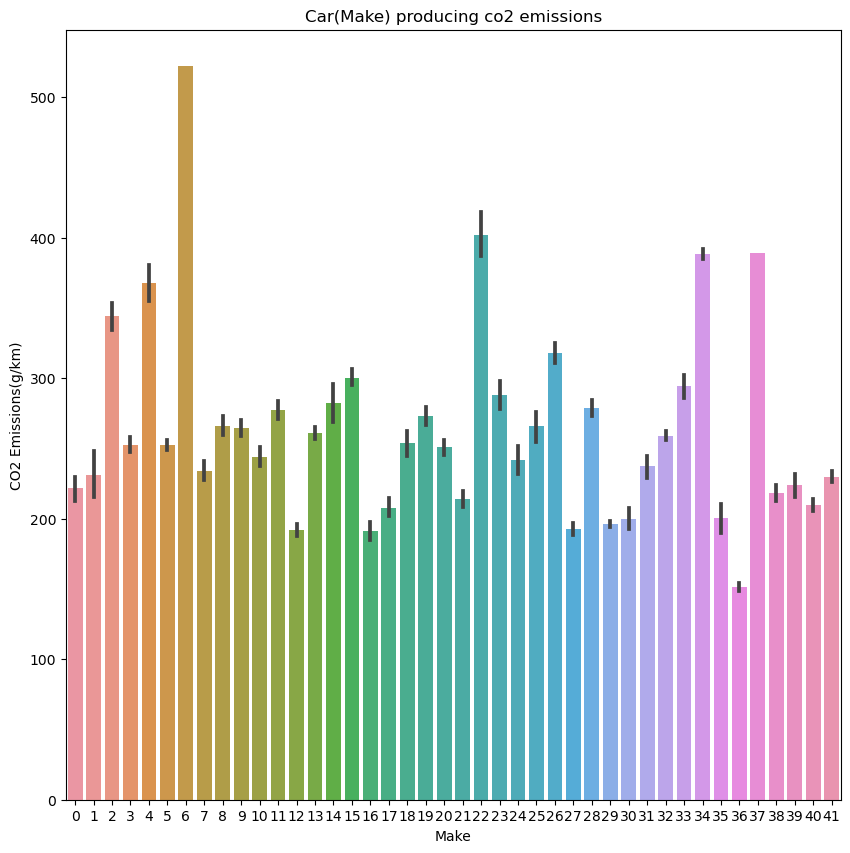

In [17]:
plt.figure(figsize=(10,10))
sns.barplot(y= "CO2 Emissions(g/km)", x= "Make", data=df,)
plt.title("Car(Make) producing co2 emissions")
plt.show()

# 36 produces highest co2 emission while 6 produces the lowest co2 emission

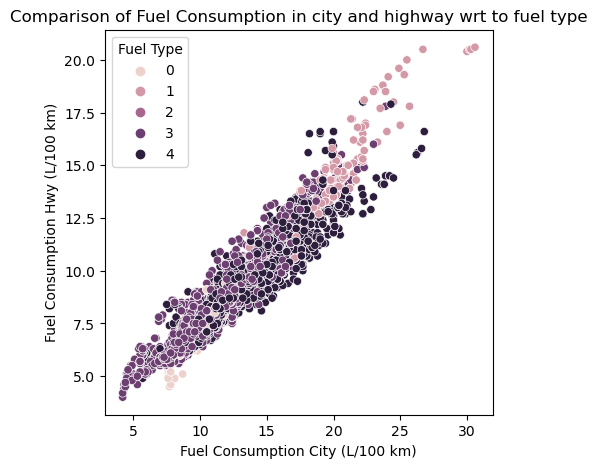

In [18]:
plt.figure(figsize=(5,5))
sns.scatterplot(x= 'Fuel Consumption City (L/100 km)', y= 'Fuel Consumption Hwy (L/100 km)', hue= 'Fuel Type', data=df )
plt.title("Comparison of Fuel Consumption in city and highway wrt to fuel type")
plt.show()

#Fuel Type 3 consumes less fuel in both city and highway areas
#Fuel Type 1 consumes more fuel in both city and highway areas

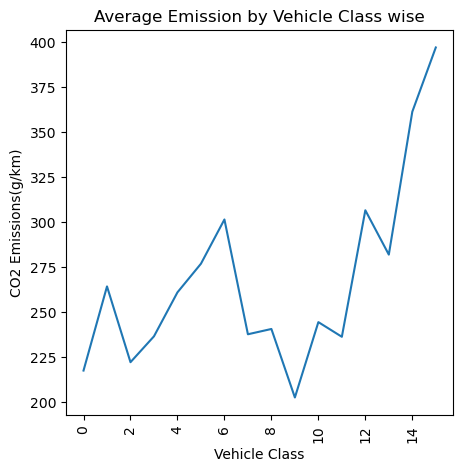

In [19]:
plt.figure(figsize=(5,5))
avg_emissions = df.groupby('Vehicle Class')['CO2 Emissions(g/km)'].mean().reset_index()
sns.lineplot(x= 'Vehicle Class' , y= 'CO2 Emissions(g/km)', data= avg_emissions)
plt.title("Average Emission by Vehicle Class wise")
plt.xticks(rotation = 90)
plt.show()

# Highest Average emission is produces by 16th Vehicle Class while lowest emission is produces by 9

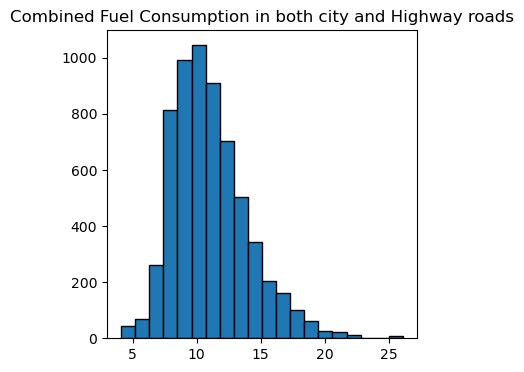

In [20]:
plt.figure(figsize= (4,4))
plt.hist('Fuel Consumption Comb (L/100 km)', bins= 20, edgecolor= 'black', data=df)
plt.title("Combined Fuel Consumption in both city and Highway roads")
plt.show()

#highest combined fuel consumption is 10 where as lowest combined fuel consmed is 21 to 25

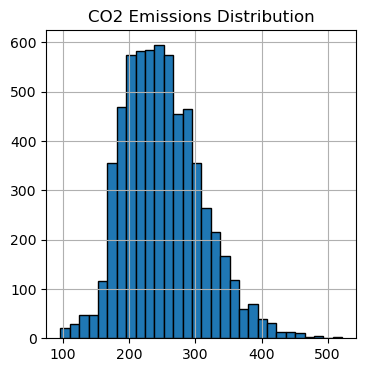

In [21]:
plt.figure(figsize=(4,4))
plt.hist('CO2 Emissions(g/km)', bins=30, edgecolor='black', data=df)
plt.title('CO2 Emissions Distribution')
plt.grid(True)
plt.show()

# Highest CO2 emission is 245 and lowest is 508

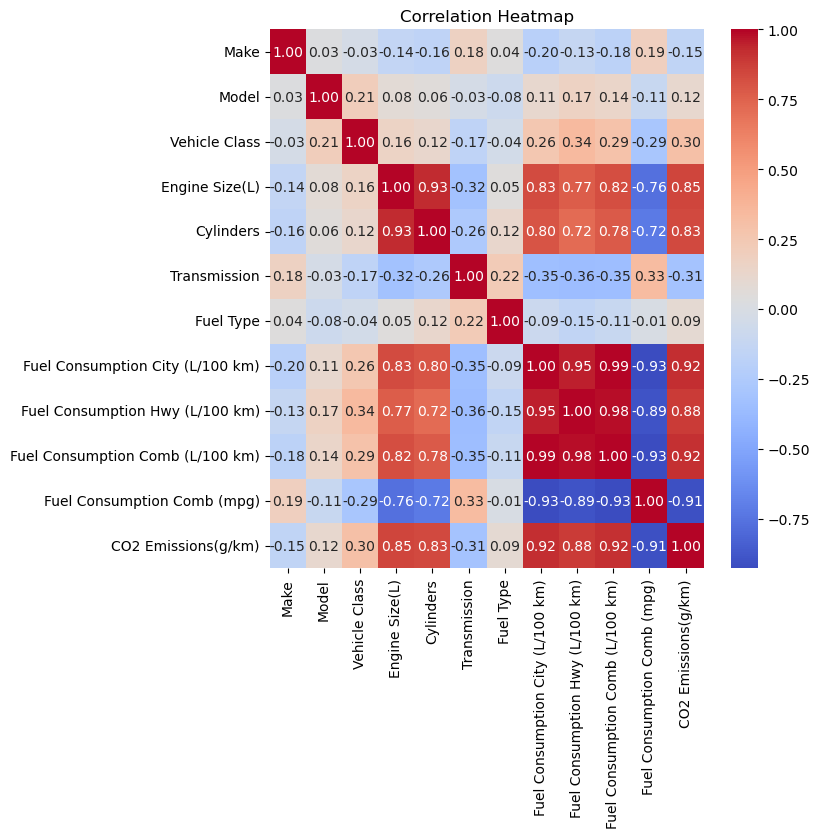

In [22]:
correlation_matrix = df.corr()
plt.figure(figsize=(7,7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

# Basic Model

In [23]:
x = df.drop(columns='CO2 Emissions(g/km)')
y = df['CO2 Emissions(g/km)']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [26]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5025, 11), (5025,), (1257, 11), (1257,))

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb

from sklearn.metrics import r2_score, mean_squared_error

In [28]:
models = [(LinearRegression(), 'Linear Regression'), (DecisionTreeRegressor(), 'Decesion Tree'), (KNeighborsRegressor(), 'KNN'), (SVR(), 'SVR'),(RandomForestRegressor(), 'Random Forest'), (AdaBoostRegressor(), 'Ada-Boost'), (GradientBoostingRegressor(), 'Gradient-Boost'), (xgb.XGBRegressor(), 'XG-Boost')]

results = []

for model, model_name in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2score = r2_score(y_test, y_pred)
    adjusted_r2 = 1 - (((1 - r2score) * (5025 - 1)) / (5025 - 11 - 1))
    mse = mean_squared_error(y_test, y_pred)
    results.append((model_name, r2score, adjusted_r2, mse))
    
columns = ['Model', 'R2-Score', 'Adj R2-Score', 'MSE']
model_comparison = pd.DataFrame(results, columns=columns)

model_comparison.sort_values(by= 'R2-Score', ascending = False, inplace=True)

In [29]:
model_comparison

,Model,R2-Score,Adj R2-Score,MSE
4,Random Forest,0.997232,0.997226,9.988915
6,Gradient-Boost,0.996215,0.996207,13.658082
7,XG-Boost,0.995267,0.995257,17.079446
1,Decesion Tree,0.994302,0.994289,20.563047
5,Ada-Boost,0.935459,0.935318,232.909021
2,KNN,0.911963,0.911770,317.700302
0,Linear Regression,0.909395,0.909196,326.968569
3,SVR,0.015737,0.013577,3551.930919


# EDA

1. Outlier Imputation

<Axes: >

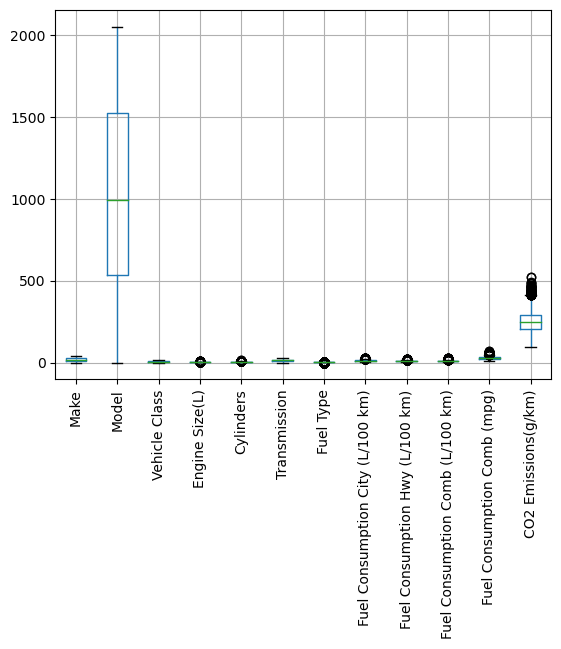

In [30]:
df.boxplot(rot=90)

In [31]:
#df['Engine Size(L)'].value_counts()
df.skew()

Make                                0.283257
Model                               0.022827
Vehicle Class                       0.016269
Engine Size(L)                      0.811968
Cylinders                           1.107595
Transmission                       -0.152625
Fuel Type                          -1.789885
Fuel Consumption City (L/100 km)    0.839215
Fuel Consumption Hwy (L/100 km)     1.108507
Fuel Consumption Comb (L/100 km)    0.924002
Fuel Consumption Comb (mpg)         0.922776
CO2 Emissions(g/km)                 0.556452
dtype: float64

<Axes: ylabel='Engine Size(L)'>

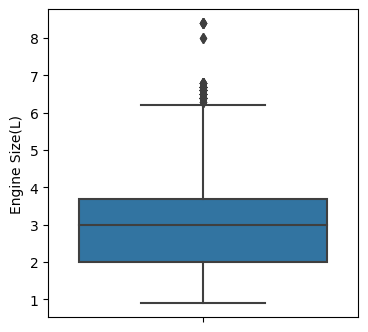

In [32]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data= df, y="Engine Size(L)")

<Axes: >

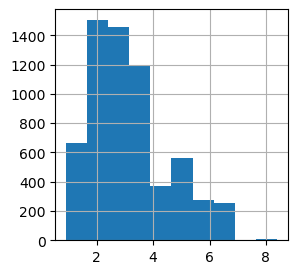

In [33]:
plt.figure(figsize=(3,3))
df['Engine Size(L)'].hist()

<Axes: xlabel='Engine Size(L)', ylabel='Density'>

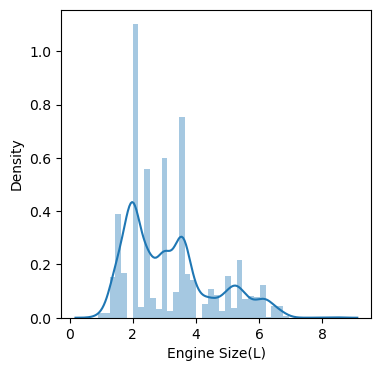

In [34]:
plt.figure(figsize=(4,4))
sns.distplot(df['Engine Size(L)'])

In [35]:
df['Engine Size(L)'].describe()

count    6282.000000
mean        3.161812
std         1.365201
min         0.900000
25%         2.000000
50%         3.000000
75%         3.700000
max         8.400000
Name: Engine Size(L), dtype: float64

In [36]:
up=df["Engine Size(L)"].mean()+3*df["Engine Size(L)"].std()
lp=df["Engine Size(L)"].mean()-3*df["Engine Size(L)"].std()
print(up),print(lp)

7.257415492875535
-0.9337924428914546


(None, None)

In [37]:
df.loc[df["Engine Size(L)"]>7.2225,"Engine Size(L)"]= 7.2225
df.loc[df["Engine Size(L)"]<0,"Engine Size(L)"]=0

<Axes: >

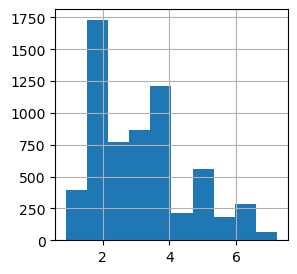

In [38]:
plt.figure(figsize=(3,3))
df['Engine Size(L)'].hist()

<Axes: ylabel='Fuel Consumption City (L/100 km)'>

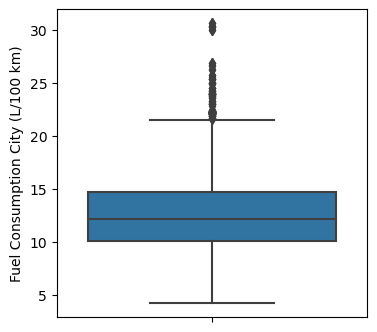

In [39]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data= df, y='Fuel Consumption City (L/100 km)')

<Axes: >

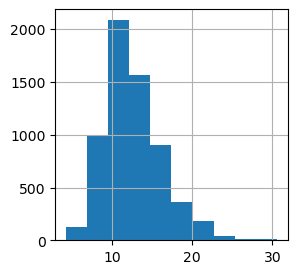

In [40]:
plt.figure(figsize=(3,3))
df['Fuel Consumption City (L/100 km)'].hist()

<Axes: xlabel='Fuel Consumption City (L/100 km)', ylabel='Density'>

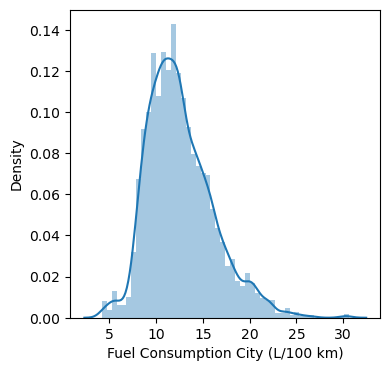

In [41]:
plt.figure(figsize=(4,4))
sns.distplot(df['Fuel Consumption City (L/100 km)'])

In [42]:
df['Fuel Consumption City (L/100 km)'].describe()

count    6282.000000
mean       12.610220
std         3.553066
min         4.200000
25%        10.100000
50%        12.100000
75%        14.700000
max        30.600000
Name: Fuel Consumption City (L/100 km), dtype: float64

In [43]:
up1=df["Fuel Consumption City (L/100 km)"].mean()+3*df["Fuel Consumption City (L/100 km)"].std()
lp1=df["Fuel Consumption City (L/100 km)"].mean()-3*df["Fuel Consumption City (L/100 km)"].std()
print(up1),print(lp1)

23.269418601242634
1.951020749282673


(None, None)

In [44]:
df.loc[df["Fuel Consumption City (L/100 km)"]>23.0573,"Fuel Consumption City (L/100 km)"]= 23.0573
df.loc[df["Fuel Consumption City (L/100 km)"]<2.0557,"Fuel Consumption City (L/100 km)"]= 2.0557

<Axes: >

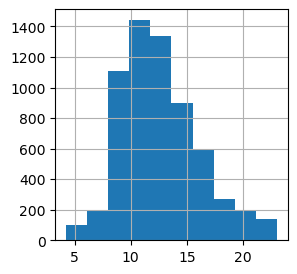

In [45]:
plt.figure(figsize=(3,3))
df['Fuel Consumption City (L/100 km)'].hist()

<Axes: ylabel='Fuel Consumption Hwy (L/100 km)'>

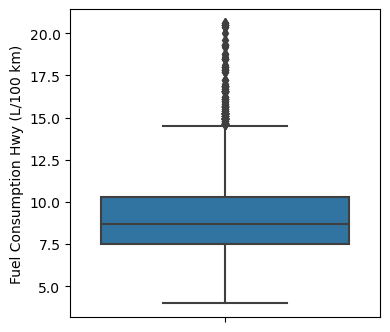

In [46]:
fig=plt.figure(figsize=(4,4))
sns.boxplot(data= df, y='Fuel Consumption Hwy (L/100 km)')

<Axes: >

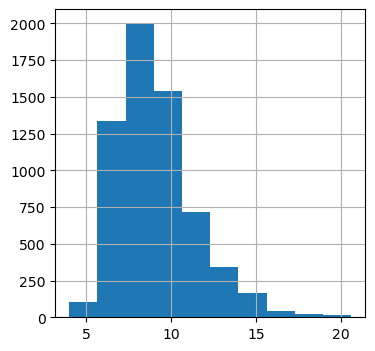

In [47]:
plt.figure(figsize=(4,4))
df['Fuel Consumption Hwy (L/100 km)'].hist()

In [48]:
df['Fuel Consumption Hwy (L/100 km)'].describe()

count    6282.000000
mean        9.070583
std         2.278884
min         4.000000
25%         7.500000
50%         8.700000
75%        10.300000
max        20.600000
Name: Fuel Consumption Hwy (L/100 km), dtype: float64

In [49]:
up2=df["Fuel Consumption Hwy (L/100 km)"].mean()+3*df["Fuel Consumption Hwy (L/100 km)"].std()
lp2=df["Fuel Consumption Hwy (L/100 km)"].mean()-3*df["Fuel Consumption Hwy (L/100 km)"].std()
print(up2),print(lp2)

15.907235581394282
2.2339296526076238


(None, None)

In [50]:
df.loc[df["Fuel Consumption Hwy (L/100 km)"]>15.7150,"Fuel Consumption Hwy (L/100 km)"]= 15.7150
df.loc[df["Fuel Consumption Hwy (L/100 km)"]<2.3683,"Fuel Consumption Hwy (L/100 km)"]= 2.3683

<Axes: >

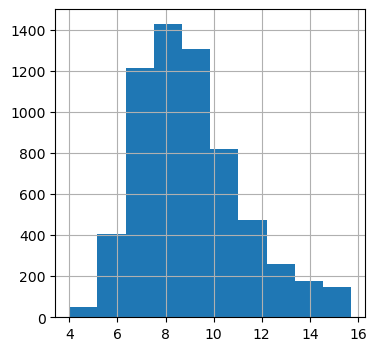

In [51]:
plt.figure(figsize=(4,4))
df['Fuel Consumption Hwy (L/100 km)'].hist()

<Axes: >

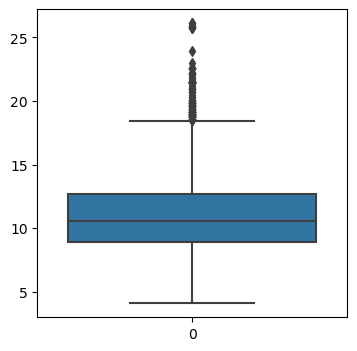

In [52]:
plt.figure(figsize=(4,4))
sns.boxplot(df['Fuel Consumption Comb (L/100 km)'])

<Axes: >

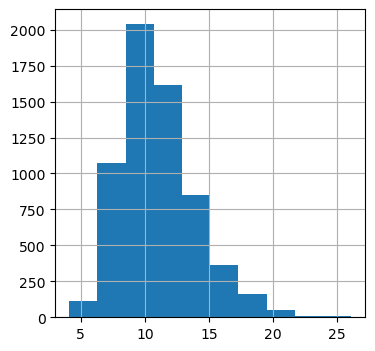

In [53]:
plt.figure(figsize=(4,4))
df['Fuel Consumption Comb (L/100 km)'].hist()

In [54]:
df['Fuel Consumption Comb (L/100 km)'].describe()

count    6282.000000
mean       11.017876
std         2.946876
min         4.100000
25%         8.900000
50%        10.600000
75%        12.700000
max        26.100000
Name: Fuel Consumption Comb (L/100 km), dtype: float64

In [55]:
up3=df["Fuel Consumption Comb (L/100 km)"].mean()+3*df["Fuel Consumption Comb (L/100 km)"].std()
lp3=df["Fuel Consumption Comb (L/100 km)"].mean()-3*df["Fuel Consumption Comb (L/100 km)"].std()
print(up3),print(lp3)

19.858503463761515
2.1772494811604854


(None, None)

In [56]:
df.loc[df["Fuel Consumption Comb (L/100 km)"]>19.6525,"Fuel Consumption Comb (L/100 km)"]= 19.6525
df.loc[df["Fuel Consumption Comb (L/100 km)"]<2.2975,"Fuel Consumption Comb (L/100 km)"]= 2.2975

<Axes: >

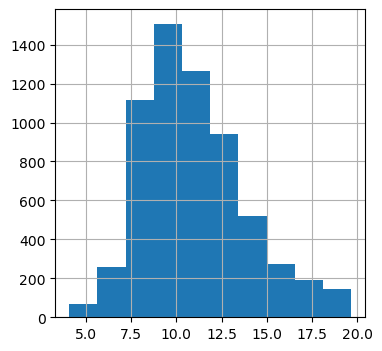

In [57]:
plt.figure(figsize=(4,4))
df['Fuel Consumption Comb (L/100 km)'].hist()

<Axes: >

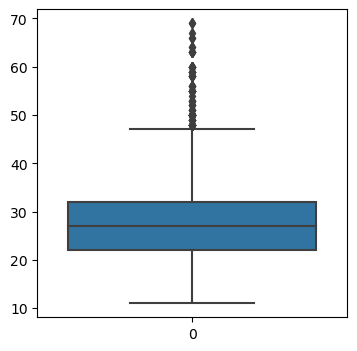

In [58]:
plt.figure(figsize=(4,4))
sns.boxplot(df['Fuel Consumption Comb (mpg)'])

<Axes: >

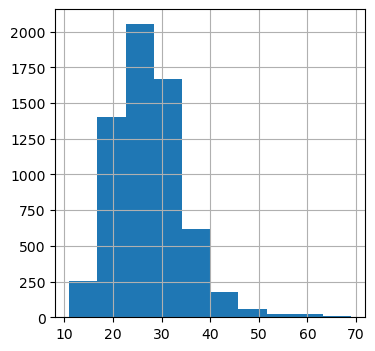

In [59]:
plt.figure(figsize=(4,4))
df['Fuel Consumption Comb (mpg)'].hist()

In [60]:
df['Fuel Consumption Comb (mpg)'].describe()

count    6282.000000
mean       27.411016
std         7.245318
min        11.000000
25%        22.000000
50%        27.000000
75%        32.000000
max        69.000000
Name: Fuel Consumption Comb (mpg), dtype: float64

In [61]:
up4=df["Fuel Consumption Comb (mpg)"].mean()+3*df["Fuel Consumption Comb (mpg)"].std()
lp4=df["Fuel Consumption Comb (mpg)"].mean()-3*df["Fuel Consumption Comb (mpg)"].std()
print(up4),print(lp4)

49.14696855666622
5.675062643588472


(None, None)

In [62]:
df.loc[df["Fuel Consumption Comb (mpg)"]>49.1772,"Fuel Consumption Comb (mpg)"]= 49.1772
df.loc[df["Fuel Consumption Comb (mpg)"]<5.7860,"Fuel Consumption Comb (mpg)"]= 5.7860

<Axes: >

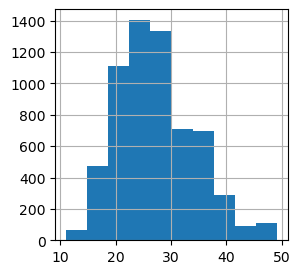

In [63]:
plt.figure(figsize=(3,3))
df['Fuel Consumption Comb (mpg)'].hist()

2. Skewness Treatment

In [64]:
df.skew()          # there are no skewed numerical columns in dataset

Make                                0.283257
Model                               0.022827
Vehicle Class                       0.016269
Engine Size(L)                      0.791684
Cylinders                           1.107595
Transmission                       -0.152625
Fuel Type                          -1.789885
Fuel Consumption City (L/100 km)    0.672289
Fuel Consumption Hwy (L/100 km)     0.823378
Fuel Consumption Comb (L/100 km)    0.727354
Fuel Consumption Comb (mpg)         0.549746
CO2 Emissions(g/km)                 0.556452
dtype: float64

3. Feature selection

# LASSO

In [65]:
from sklearn.linear_model import Lasso

In [66]:
lasso = Lasso()

In [67]:
x1 = df.drop(columns="CO2 Emissions(g/km)")
y1 = df["CO2 Emissions(g/km)"]

In [68]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=0.2, random_state=50)

In [69]:
x1_train.shape

(5025, 11)

In [70]:
lasso.fit(x1_train, y1_train)

Lasso()

In [71]:
lasso_p = lasso.predict(x1_test)
lasso_p

array([231.99226426, 199.63330813, 179.23072417, ..., 252.40529265,
       299.77912488, 294.62736831])

In [72]:
lasso.coef_

array([ 9.18182809e-02,  4.04055876e-04,  6.91778037e-01,  3.61243343e+00,
        6.13363566e+00, -0.00000000e+00,  5.84436572e+00,  0.00000000e+00,
        9.71237135e-01,  5.90923972e+00, -3.31176108e+00])

In [73]:
lr2=lasso.score(x1_train,y1_train)
lr2

0.9142639821387587

In [74]:
df.shape

(6282, 12)

In [75]:
adj_l=1-(((1-lr2)*(5025-1))/(5025-11-1))
adj_l

0.9140758520377267

In [76]:
df1=pd.DataFrame({"Importances":list(lasso.coef_),"columns":list(x1)})
df1

,Importances,columns
0,0.091818,Make
1,0.000404,Model
2,0.691778,Vehicle Class
3,3.612433,Engine Size(L)
4,6.133636,Cylinders
5,-0.000000,Transmission
6,5.844366,Fuel Type
7,0.000000,Fuel Consumption City (L/100 km)
8,0.971237,Fuel Consumption Hwy (L/100 km)
9,5.909240,Fuel Consumption Comb (L/100 km)


In [77]:
df2= df.drop(['Fuel Consumption City (L/100 km)','Transmission'], axis =1)

In [78]:
df2.shape

(6282, 10)

# Model after EDA

In [79]:
x2 = df.drop(columns="CO2 Emissions(g/km)")
y2 = df["CO2 Emissions(g/km)"]

In [80]:
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, test_size=0.2, random_state=50)

In [81]:
x2_train.shape

(5025, 11)

In [82]:
models1 = [(LinearRegression(), 'Linear Regression'), (DecisionTreeRegressor(), 'Decesion Tree'), (KNeighborsRegressor(), 'KNN'), (SVR(), 'SVR'),(RandomForestRegressor(), 'Random Forest'), (AdaBoostRegressor(), 'Ada-Boost'), (GradientBoostingRegressor(), 'Gradient-Boost'), (xgb.XGBRegressor(), 'XG-Boost')]

results1 = []

for model, model_name in models1:
    model.fit(x2_train, y2_train)
    y_pred1 = model.predict(x2_test)
    
    r2score1 = r2_score(y2_test, y_pred1)
    adjusted_r2_1 = 1 - (((1 - r2score1) * (5025 - 1)) / (5025 - 11 - 1))
    mse1 = mean_squared_error(y2_test, y_pred1)
    results1.append((model_name, r2score1, adjusted_r2_1, mse1))
    
columns = ['Model', 'R2-Score', 'Adj R2-Score', 'MSE']
model_comparison1 = pd.DataFrame(results1, columns=columns)

model_comparison1.sort_values(by= 'R2-Score', ascending = False, inplace=True)

In [83]:
model_comparison1         # model after eda

,Model,R2-Score,Adj R2-Score,MSE
7,XG-Boost,0.997466,0.997460,9.101927
4,Random Forest,0.997093,0.997087,10.440454
1,Decesion Tree,0.996514,0.996506,12.520773
6,Gradient-Boost,0.995818,0.995809,15.019445
5,Ada-Boost,0.928626,0.928470,256.349506
0,Linear Regression,0.919017,0.918839,290.863086
2,KNN,0.918498,0.918319,292.725314
3,SVR,0.015729,0.013569,3535.152285


In [84]:
model_comparison               # basic model

,Model,R2-Score,Adj R2-Score,MSE
4,Random Forest,0.997232,0.997226,9.988915
6,Gradient-Boost,0.996215,0.996207,13.658082
7,XG-Boost,0.995267,0.995257,17.079446
1,Decesion Tree,0.994302,0.994289,20.563047
5,Ada-Boost,0.935459,0.935318,232.909021
2,KNN,0.911963,0.911770,317.700302
0,Linear Regression,0.909395,0.909196,326.968569
3,SVR,0.015737,0.013577,3551.930919


# Model after Feature selection

In [85]:
x3 = df2.drop(columns="CO2 Emissions(g/km)")
y3 = df2["CO2 Emissions(g/km)"]

In [86]:
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, test_size=0.2, random_state=50)

In [87]:
x3_train.shape, y3_test.shape

((5025, 9), (1257,))

In [88]:
models2 = [(LinearRegression(), 'Linear Regression'), (DecisionTreeRegressor(), 'Decesion Tree'), (KNeighborsRegressor(), 'KNN'), (SVR(), 'SVR'),(RandomForestRegressor(), 'Random Forest'), (AdaBoostRegressor(), 'Ada-Boost'), (GradientBoostingRegressor(), 'Gradient-Boost'), (xgb.XGBRegressor(), 'XG-Boost')]

results2 = []

for model, model_name in models2:
    model.fit(x3_train, y3_train)
    y_pred2 = model.predict(x3_test)
    
    r2score2 = r2_score(y3_test, y_pred2)
    adjusted_r2_2 = 1 - (((1 - r2score1) * (5025 - 1)) / (5025 - 9 - 1))
    mse2 = mean_squared_error(y3_test, y_pred2)
    results2.append((model_name, r2score2, adjusted_r2_2, mse2))
    
columns = ['Model', 'R2-Score', 'Adj R2-Score', 'MSE']
model_comparison2 = pd.DataFrame(results2, columns=columns)

model_comparison2.sort_values(by= 'R2-Score', ascending = False, inplace=True)

In [89]:
model_comparison2       # model after lasso

,Model,R2-Score,Adj R2-Score,MSE
7,XG-Boost,0.997699,0.997461,8.262715
4,Random Forest,0.997349,0.997461,9.520072
1,Decesion Tree,0.996713,0.997461,11.803987
6,Gradient-Boost,0.996428,0.997461,12.830099
5,Ada-Boost,0.929379,0.997461,253.645129
2,KNN,0.926957,0.997461,262.344853
0,Linear Regression,0.919420,0.997461,289.413999
3,SVR,0.013458,0.997461,3543.308612


In [90]:
model_comparison1 # model after eda

,Model,R2-Score,Adj R2-Score,MSE
7,XG-Boost,0.997466,0.997460,9.101927
4,Random Forest,0.997093,0.997087,10.440454
1,Decesion Tree,0.996514,0.996506,12.520773
6,Gradient-Boost,0.995818,0.995809,15.019445
5,Ada-Boost,0.928626,0.928470,256.349506
0,Linear Regression,0.919017,0.918839,290.863086
2,KNN,0.918498,0.918319,292.725314
3,SVR,0.015729,0.013569,3535.152285


In [91]:
model_comparison  # basic model

,Model,R2-Score,Adj R2-Score,MSE
4,Random Forest,0.997232,0.997226,9.988915
6,Gradient-Boost,0.996215,0.996207,13.658082
7,XG-Boost,0.995267,0.995257,17.079446
1,Decesion Tree,0.994302,0.994289,20.563047
5,Ada-Boost,0.935459,0.935318,232.909021
2,KNN,0.911963,0.911770,317.700302
0,Linear Regression,0.909395,0.909196,326.968569
3,SVR,0.015737,0.013577,3551.930919


# To check the performance of the model by Scatter plot

In [92]:
df3 = pd.DataFrame({"Actual":y3_test, "Predicted":y_pred2})
df3

,Actual,Predicted
3892,238,234.313477
803,184,182.930557
977,177,178.472870
542,253,257.469604
7323,190,191.287659
...,...,...
5911,114,113.831520
695,352,357.352478
6315,243,242.989685
4591,298,295.796875


In [99]:
#m1 = AdaBoostRegressor()
#m1.fit(x3_train,y3_train)

In [94]:
#p1 = m1.predict(x3_test)

In [100]:
#r2s = r2_score(y3_test, p1)
#r2s

In [101]:
#adjr2s = 1 - (((1 - r2s) * (5025 - 1)) / (5025 - 9 - 1))
#adjr2s

In [102]:
#mser = mean_squared_error(y3_test, p1)
#mser

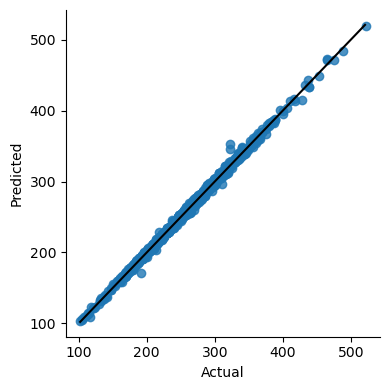

In [98]:

sns.lmplot(x = "Actual", y = "Predicted", data= df3, fit_reg=False, height=4)
d_line = np.arange(df3.min().min(), df3.max().max())
plt.plot(d_line,d_line,color="black", linestyle="-")
plt.show()

In [ ]:
l